In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

%matplotlib notebook

%run utils.py

In [2]:
df = pd.read_csv('data/yellow_tripdata_2009-01.csv')

In [3]:
df = filter_coords(filter_cols(df))

In [4]:
df['Trip_Dropoff_DateTime'] = pd.to_datetime(df['Trip_Dropoff_DateTime'])
df['Trip_Pickup_DateTime'] = pd.to_datetime(df['Trip_Pickup_DateTime'])
df['duration'] = (df['Trip_Dropoff_DateTime'] - df['Trip_Pickup_DateTime']).dt.total_seconds()
df['weekday'] = df['Trip_Pickup_DateTime'].dt.weekday
df['hour'] = df['Trip_Pickup_DateTime'].dt.hour

w = pd.get_dummies(df['weekday'])
w.columns = ['week_{}'.format(c) for c in w.columns]
hour = pd.get_dummies(df['hour'])
hour.columns = ['hour_{}'.format(c) for c in hour.columns ]
df = pd.concat([df, w, hour], axis=1)
x = ['duration', 'Trip_Distance','Start_Lon', 'Start_Lat', 'End_Lon', 'End_Lat', 
'week_0', 'week_1', 'week_2', 'week_3', 'week_4', 'week_5',
'week_6', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5',
'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23']

In [5]:
for c in ['Trip_Distance', 'Start_Lon', 'Start_Lat', 'End_Lon', 'End_Lat']:
    print (c)
    print (df[c].mean())
    print (df[c].std())
    print()
    df[c] = (df[c] - df[c].mean()) / df[c].std()

Trip_Distance
2.278250866273763
2.182698108152537

Start_Lon
-73.97824644201427
0.02397839920906085

Start_Lat
40.75321579662839
0.022644784788450407

End_Lon
-73.97636661843643
0.02600674930527163

End_Lat
40.75316297629201
0.025792228356270836



In [15]:
len(df) / 1000

13484.192

In [13]:
df.head()[-['duration',]]

TypeError: bad operand type for unary -: 'list'

In [6]:
df[x].to_csv('data/yellow_tripdata_2009-01_cleaned.csv',index=False)

In [3]:
df.head()

,vendor_name,Trip_Pickup_DateTime,Trip_Dropoff_DateTime,Passenger_Count,Trip_Distance,Start_Lon,Start_Lat,Rate_Code,store_and_forward,End_Lon,End_Lat,Payment_Type,Fare_Amt,surcharge,mta_tax,Tip_Amt,Tolls_Amt,Total_Amt
0,VTS,2009-01-04 02:52:00,2009-01-04 03:02:00,1,2.63,-73.991957,40.721567,NaN,NaN,-73.993803,40.695922,CASH,8.9,0.5,NaN,0.00,0.0,9.40
1,VTS,2009-01-04 03:31:00,2009-01-04 03:38:00,3,4.55,-73.982102,40.736290,NaN,NaN,-73.955850,40.768030,Credit,12.1,0.5,NaN,2.00,0.0,14.60
2,VTS,2009-01-03 15:43:00,2009-01-03 15:57:00,5,10.35,-74.002587,40.739748,NaN,NaN,-73.869983,40.770225,Credit,23.7,0.0,NaN,4.74,0.0,28.44
3,DDS,2009-01-01 20:52:58,2009-01-01 21:14:00,1,5.00,-73.974267,40.790955,NaN,NaN,-73.996558,40.731849,CREDIT,14.9,0.5,NaN,3.05,0.0,18.45
4,DDS,2009-01-24 16:18:23,2009-01-24 16:24:56,1,0.40,-74.001580,40.719382,NaN,NaN,-74.008378,40.720350,CASH,3.7,0.0,NaN,0.00,0.0,3.70


<IPython.core.display.Javascript object>


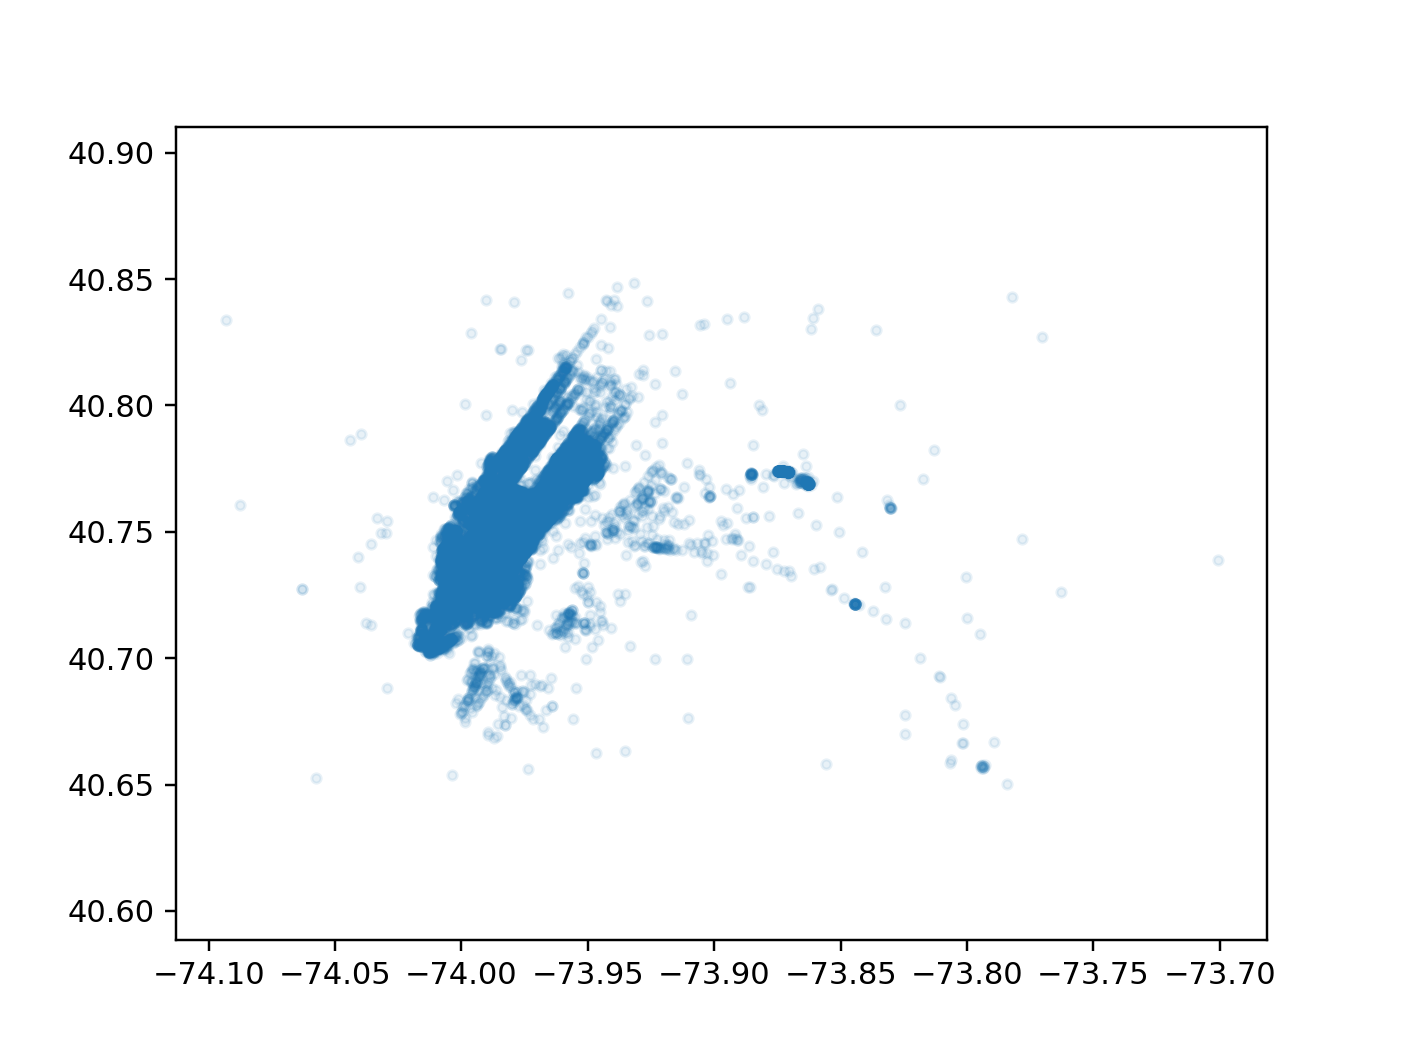

In [87]:
lon_lbound, lon_rbound = -74.1, -73.7
lat_lbound, lat_rbound = 40.65, 40.85

df_small = df.iloc[:20000]
df_small = df_small[(df_small.Start_Lon < lon_rbound) & (df_small.Start_Lon > lon_lbound)]
df_small = df_small[(df_small.Start_Lat < lat_rbound) & (df_small.Start_Lat > lat_lbound)]
plt.plot(df_small.Start_Lon, df_small.Start_Lat, '.', alpha=.1)
plt.xlim((-74.5,-73.5))
plt.ylim((40,41))
plt.axis('equal');

# Try to fit a Model

In [10]:
n_lines = 5
p_explained = .95

In [22]:
params = Variable(torch.randn((n_lines, 3)))

In [23]:
params

Variable containing:
 0.6007 -0.6021 -0.1374
-0.2569 -0.5973  1.3195
 0.4080  0.3829  0.3309
 0.5637  0.6083  0.4241
 0.4836 -1.4053  0.4179
[torch.FloatTensor of size 5x3]

In [44]:
def loss(batch):
    num = torch.abs(torch.ger(params[0,:],batch[0,:]) \
                    + torch.ger(params[1,:],batch[1,:]) \
                    + torch.ger(params[2,:], Variable())
    den = torch.sqrt(params[0,:]**2 + params[1,:]**2)
    distance = num / den
    

In [72]:
x

Variable containing:
  3   4
  5  12
[torch.FloatTensor of size 2x2]

In [75]:
m = torch.nn.Linear(2,n_lines, bias=True)

In [76]:
m(x)

Variable containing:
-0.1977 -4.1964  0.6344  2.5700  2.4832
-0.2068 -9.4320  0.8337  6.0469  4.4359
[torch.FloatTensor of size 2x5]

In [63]:
torch.ger(params[0,:], x[0,:])

Variable containing:
 1.8022  2.4030
-1.8064 -2.4085
-0.4122 -0.5496
[torch.FloatTensor of size 3x2]

In [70]:
torch.ger(params[2,:], Variable(torch.ones(2)))

Variable containing:
 0.4080  0.4080
 0.3829  0.3829
 0.3309  0.3309
[torch.FloatTensor of size 3x2]

In [71]:
params[2,:]

Variable containing:
 0.4080
 0.3829
 0.3309
[torch.FloatTensor of size 3]

In [60]:
loss(x)

RuntimeError: inconsistent tensor size, expected r_ [3 x 2], t [3 x 2] and src [3] to have the same number of elements, but got 6, 6 and 3 elements respectively at /Users/soumith/miniconda2/conda-bld/pytorch_1503975723910/work/torch/lib/TH/generic/THTensorMath.c:887

In [38]:
torch.norm(x.float(), keepdim=True)

TypeError: torch.norm received an invalid combination of arguments - got (torch.FloatTensor, keepdim=bool), but expected one of:
 * (torch.FloatTensor source)
 * (torch.FloatTensor source, float p)
      didn't match because some of the keywords were incorrect: keepdim
 * (torch.FloatTensor source, float p, int dim)
 * (torch.FloatTensor source, float p, int dim, bool keepdim)


In [39]:
torch.sq


  3   4
  5  12
[torch.DoubleTensor of size 2x2]

In [54]:
lst = [2, 3, 1]

In [55]:
np.argsort(lst)

array([2, 0, 1])

In [ ]:
class StreetNet(torch.nn.Module):
    def __init__(self, n_lines):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        super(StreetNet, self).__init__()
        self.linear1 = torch.nn.Linear(2, n_lines)

    def forward(self, x):
        """
        In the forward function we accept a Variable of input data and we must return
        a Variable of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Variables.
        """
        numerator =  torch.abs(self.linear1(x))
        coeffs, bias = self.linear1.parameters()
        
        return y_pred

In [ ]:
torch.arg

In [83]:
coeffs, bias =  m.parameters()

In [85]:
bias

Parameter containing:
-0.4397
-0.4512
-0.2331
-0.1069
 0.5921
[torch.FloatTensor of size 5]

In [88]:
s = 'abc'

In [92]:
s.endswith(('b', 'c'))

True

In [91]:
s.endswith?